In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r"D:\Dataset\Placement_Data.csv")

1.sl_no : Serial Number,

2.ssc_p : Secondary Education percentage- 10th Grade

3.ssc_b : Board of Education- Central/ Others

4.hsc_p : Higher Secondary Education percentage- 12th Grade

5.hsc_b : Board of Education- Central/ Others

6.hsc_s : Specialization in Higher Secondary Education

7.degree_p : Degree Percentage

8.degree_t : Under Graduation(Degree type)- Field of degree education

9.workex : Work Experience

10.etest_p : Employability test percentage ( conducted by college)

11.specialisation : Post Graduation(MBA)- Specialization

12.mba_p : MBA percentage

13.status : Status of placement- Placed/Not placed

14.salary : Salary if the student is placed

In [3]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
#all the columns
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [5]:
#shape
df.shape


(215, 15)

In [6]:

df["ssc_p"].mean()

np.float64(67.30339534883721)

In [7]:
df["ssc_p"].max()

np.float64(89.4)

In [8]:
df[df.ssc_p==df.ssc_p.max()].shape[0]

1

In [9]:
df[df["ssc_p"]==df["ssc_p"].max()]["status"]

145    Placed
Name: status, dtype: object

In [10]:
#number of student places or not placed
df["status"].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

In [11]:
#the most common degree student who palced.
df[df["status"]=="Placed"]["degree_t"].value_counts().head(1)

degree_t
Comm&Mgmt    102
Name: count, dtype: int64

In [12]:
#number of unique degree in dataset
df["degree_t"].nunique()

3

In [13]:
#correlation between 10th and 12th percentage
df[["ssc_p","hsc_p"]].corr()

,ssc_p,hsc_p
ssc_p,1.000000,0.511472
hsc_p,0.511472,1.000000


In [14]:
#correlation metrix
#df.corr()

### Data Pre Processing

In [15]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [16]:
#-----first step for data pre processing to indentify the column which is not required for our model and remove from the data set
df.drop(columns=["sl_no"],inplace=True)

In [17]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [18]:
#checking the  null values and if there is null values fill
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [19]:
# so there is salary which is having null values so we have to remove the null or fill the nulls
# fill the null
df.fillna(0,inplace=True)

In [20]:
#let draw a scatter plot between 10th abd 12th percentage based on placed and not placed
#lets give colours to scatter chart
colors={"Placed":"tab:green","Not Placed":"tab:red"}
df["status"].map(colors)

0      tab:green
1      tab:green
2      tab:green
3        tab:red
4      tab:green
         ...    
210    tab:green
211    tab:green
212    tab:green
213    tab:green
214      tab:red
Name: status, Length: 215, dtype: object

In [21]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [22]:
column=["ssc_p","hsc_p","degree_p","etest_p","mba_p","salary"]


In [23]:
#removing the outliers from the data
for i in column:
  percentile25=df[i].quantile(0.25)
  percentile75=df[i].quantile(0.75)
  IQR=percentile75-percentile25
  upperlimit=percentile75+(1.5*IQR)
  lowerlimit=percentile25-(1.5*IQR)
  df=df[(df[i]<upperlimit) & (df[i]>lowerlimit)]
  

# Label Encoding

In [24]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le=LabelEncoder()

In [27]:
df["ssc_b"]

0       Others
1      Central
2      Central
3      Central
4      Central
        ...   
210     Others
211     Others
212     Others
213     Others
214    Central
Name: ssc_b, Length: 205, dtype: object

In [28]:
df["ssc_b"]=le.fit_transform(df["ssc_b"])

In [29]:
df["ssc_b"]

0      1
1      0
2      0
3      0
4      0
      ..
210    1
211    1
212    1
213    1
214    0
Name: ssc_b, Length: 205, dtype: int64

In [30]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,1,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,0,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,0,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,0,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,0,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [31]:
col=["gender","hsc_b","degree_t","workex","specialisation","status","hsc_s"]

In [32]:
for i in col:
  df[i]=le.fit_transform(df[i])

In [33]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


#Linear Regression Model


Extract the independent and dependent variables


In [34]:
x=df.iloc[:,0:-1].values

In [35]:
y=df.iloc[:,-1].values


In [36]:
x

array([[ 1.  , 67.  ,  1.  , ...,  1.  , 58.8 ,  1.  ],
       [ 1.  , 79.33,  0.  , ...,  0.  , 66.28,  1.  ],
       [ 1.  , 65.  ,  0.  , ...,  0.  , 57.8 ,  1.  ],
       ...,
       [ 1.  , 67.  ,  1.  , ...,  0.  , 69.72,  1.  ],
       [ 0.  , 74.  ,  1.  , ...,  1.  , 60.23,  1.  ],
       [ 1.  , 62.  ,  0.  , ...,  1.  , 60.22,  0.  ]])

In [37]:
y

array([270000., 200000., 250000.,      0., 425000.,      0.,      0.,
       252000., 231000.,      0., 260000., 250000.,      0., 218000.,
            0., 200000., 300000.,      0.,      0., 236000., 265000.,
       393000., 360000., 300000.,      0., 240000., 265000., 350000.,
            0., 250000.,      0., 278000., 260000.,      0., 300000.,
            0., 320000., 240000., 411000., 287000.,      0., 300000.,
       200000.,      0.,      0., 204000., 250000., 200000.,      0.,
            0., 450000., 216000., 220000., 240000., 360000., 268000.,
       265000., 260000., 300000., 240000.,      0., 240000.,      0.,
       275000., 275000.,      0., 275000., 360000., 240000., 240000.,
       218000., 336000.,      0., 230000., 500000., 270000.,      0.,
       240000., 300000.,      0., 300000., 300000., 400000., 220000.,
            0., 210000., 210000., 300000.,      0., 230000.,      0.,
       260000., 420000., 300000.,      0., 220000.,      0.,      0.,
       380000., 3000

#**Spliting the dataset into training and testing**


In [38]:
from sklearn.model_selection import train_test_split

* features: This is your input data or features.
* labels: This is the corresponding target variable.
test_size: This parameter determines the proportion of the dataset to include in the test split. In the example above, test_size=0.2 means 20% of the data will be used for testing, and the remaining 80% will be used for training.
random_state: This parameter ensures reproducibility. Providing a fixed value (e.g., random_state=42) ensures that the random splitting is the same every time you run the code. It's useful if you want to reproduce the same train-test split.

In [39]:
x_train , x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=5)

#**Used standardization for scalling the data  and performed Linear Regression**


---



In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
sc=StandardScaler()

In [42]:
x_train=sc.fit_transform(x_train)

In [43]:
x_train

array([[ 0.71753152,  0.60502531, -0.93051258, ..., -0.88264929,
        -0.73314211,  0.68640647],
       [-1.39366699,  0.92686572,  1.0746765 , ..., -0.88264929,
         0.26554735,  0.68640647],
       [ 0.71753152, -0.43622305, -0.93051258, ..., -0.88264929,
        -1.34335378,  0.68640647],
       ...,
       [ 0.71753152,  0.60502531,  1.0746765 , ...,  1.13295282,
        -0.96197148,  0.68640647],
       [-1.39366699, -0.05758728, -0.93051258, ...,  1.13295282,
         1.74495589, -1.45686272],
       [-1.39366699,  0.88900214,  1.0746765 , ..., -0.88264929,
        -0.14421688,  0.68640647]])

In [44]:
x_test=sc.transform(x_test)

In [45]:
x_test

array([[ 0.71753152,  1.83559156, -0.93051258,  0.76526393, -1.211504  ,
         1.09271933, -0.12085542,  1.45174816,  1.3540064 ,  0.30430063,
         1.13295282,  1.80349364,  0.68640647],
       [-1.39366699,  1.07832002,  1.0746765 ,  0.96706395,  0.82542031,
        -0.63084827,  2.85578334, -0.71525153, -0.73854895,  1.80192015,
        -0.88264929,  1.23053326,  0.68640647],
       [-1.39366699, -2.3294019 , -0.93051258, -0.64733622,  0.82542031,
         1.09271933, -0.12085542, -0.71525153, -0.73854895,  1.62669866,
         1.13295282,  0.14137637, -1.45686272],
       [ 0.71753152, -1.25028996, -0.93051258, -0.5343282 , -1.211504  ,
        -0.63084827, -1.43057648, -0.71525153, -0.73854895, -0.29474718,
         1.13295282,  0.09348185, -1.45686272],
       [-1.39366699,  0.1317306 , -0.93051258,  1.16886397, -1.211504  ,
        -0.63084827,  0.92096814, -0.71525153, -0.73854895,  0.00477672,
         1.13295282,  0.10944669,  0.68640647],
       [ 0.71753152, -1.129126

In [46]:
#linear Regression
from sklearn.linear_model import LinearRegression

In [47]:
reg=LinearRegression()

In [48]:
reg.fit(x_train,y_train)

LinearRegression()

In [49]:
reg.intercept_

np.float64(187895.42483660122)

In [50]:
reg.coef_

array([ 11811.08032642,   4098.50983022,   1303.5547885 ,  -6285.41165318,
        -3692.92861591,    389.20360453, -13466.73828307,  11769.91216011,
          562.86360183,   2253.20146498,  -6524.48726664,  13592.66084468,
       131314.9576229 ])

In [51]:
#predicting the data
y_pred=reg.predict(x_test)

In [52]:
y_pred

array([ 3.30189779e+05,  2.37271320e+05, -3.81989552e+04,  9.95767855e+03,
        2.30648664e+05,  2.74855899e+05, -6.94724468e+04,  2.68538527e+05,
       -2.15768648e+04,  2.31923793e+05,  2.95445875e+05,  2.54667418e+05,
        2.51593002e+05,  2.57705277e+05,  2.66031883e+05,  2.49921614e+05,
        1.69423322e+04,  2.88896104e+05,  2.41462915e+05,  2.48675629e+05,
        2.93771821e+04,  2.33743489e+05,  2.48123752e+05,  2.77353305e+05,
        2.54016917e+05, -6.98343195e+03,  4.30238297e+04, -2.27472533e+02,
        2.86271808e+05,  2.69174829e+05,  2.68784476e+05,  2.47739053e+05,
        1.22999348e+04,  2.68121658e+05,  2.32109302e+05,  2.67247150e+05,
        2.71761939e+05, -1.09741541e+04,  2.85934985e+05,  2.51146010e+05,
       -1.32298583e+04,  2.77806977e+05,  2.78022518e+05,  2.60714126e+05,
        3.14202242e+05,  2.59879666e+05,  2.95409051e+05,  2.53995924e+04,
        2.89392168e+05,  2.37978604e+05,  3.08905426e+05,  2.96405995e+05])

In [53]:
y_test

array([300000., 393000.,      0.,      0., 300000., 260000.,      0.,
       240000.,      0., 250000., 400000., 265000., 233000., 265000.,
       252000., 275000.,      0., 336000., 240000., 300000.,      0.,
       300000., 200000., 236000., 240000.,      0.,      0.,      0.,
       400000., 360000., 300000., 220000.,      0., 300000., 287000.,
       250000., 265000.,      0., 360000., 216000.,      0., 250000.,
       264000., 380000., 300000., 360000., 276000.,      0., 500000.,
       250000., 450000., 240000.])

#**Evaluate the model using MSE, RMSE and R square**


In [54]:
from sklearn import metrics

In [55]:
MSE=metrics.mean_absolute_error(y_test,y_pred)
MSE

np.float64(43507.77726773961)

In [56]:
RMSE=np.sqrt(MSE)
RMSE

np.float64(208.58517988519608)

In [57]:
R2 = metrics.r2_score(y_test,y_pred)

In [58]:
#accurancy of the model is 80%
R2

0.8093192735399599

#**Logistics Regression Model**

In [59]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


**Extract the independent and dependent (status)variable**

---



In [60]:
X=df.drop(["status","salary"],axis=1).values

In [61]:
X

array([[ 1.  , 67.  ,  1.  , ..., 55.  ,  1.  , 58.8 ],
       [ 1.  , 79.33,  0.  , ..., 86.5 ,  0.  , 66.28],
       [ 1.  , 65.  ,  0.  , ..., 75.  ,  0.  , 57.8 ],
       ...,
       [ 1.  , 67.  ,  1.  , ..., 59.  ,  0.  , 69.72],
       [ 0.  , 74.  ,  1.  , ..., 70.  ,  1.  , 60.23],
       [ 1.  , 62.  ,  0.  , ..., 89.  ,  1.  , 60.22]])

In [62]:
Y=df["status"].values

In [63]:
Y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0])

**Split the dataset into training and testing dataset**


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test , Y_train, Y_test= train_test_split(X,Y,test_size=0.25,random_state=50)

** USe standardization**

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
ss=StandardScaler()

In [68]:
X_train=ss.fit_transform(X_train)


In [69]:
X_test=ss.fit_transform(X_test)

**Build the logistic Regression Model**

In [70]:
Y_train

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [71]:
Y_test

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1])

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
classifier=LogisticRegression()

In [74]:
classifier.fit(X_train,Y_train)

LogisticRegression()

In [75]:
Y_pred=classifier.predict(X_test)

In [76]:
Y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [77]:
#fpr,tpr,threshold=metrics.roc_curve(Y_test,classifier.predict(X_train)[:,1])

In [78]:
#plt.plot(fpr,tpr)

**confusion metrix with heatmap**



In [79]:
from sklearn.metrics import confusion_matrix

In [80]:
confusion_matrix(Y_test,Y_pred)

array([[12,  4],
       [ 2, 34]])

In [81]:
tn,fp,fn,tp=confusion_matrix(Y_test,Y_pred).ravel()

<Axes: >

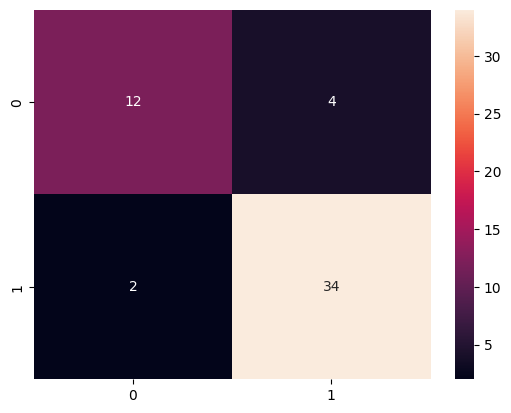

In [83]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming Y_test and Y_pred are defined
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True)


**Evaluating the model and Finding Accuracy**


In [84]:
from sklearn.metrics import accuracy_score

In [85]:
accuracy_score(Y_test,Y_pred)
#we have 88% accurate model

0.8846153846153846


**Find out the auc roc score**



In [86]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,Y_pred)

np.float64(0.8472222222222222)

**Find out number of 0 classes in Y_test**


In [87]:
Y_test

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1])

In [88]:
sum(Y_test==0)

np.int64(16)

In [89]:
sum(Y_test==1)

np.int64(36)

**find out the recall and precision**

In [90]:
recall=tp/(tp+fn)

In [91]:
recall

np.float64(0.9444444444444444)

In [92]:
precision=tp/(tp+fp)

In [93]:
precision

np.float64(0.8947368421052632)

**Created a classification report  **

In [94]:
from sklearn.metrics import classification_report


In [95]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.89      0.94      0.92        36

    accuracy                           0.88        52
   macro avg       0.88      0.85      0.86        52
weighted avg       0.88      0.88      0.88        52



In [96]:
p_forClass0=(tn/(tn+fn))

In [97]:
p_forClass0

np.float64(0.8571428571428571)

In [98]:
r_forClass0=tn/(tn+fp)

In [99]:
r_forClass0

np.float64(0.75)

In [100]:
f1_forClass0=(2*(p_forClass0)*(r_forClass0))/((p_forClass0)+(r_forClass0))

In [101]:
f1_forClass0

np.float64(0.7999999999999999)

In [102]:
#probabiltu method for Y_predection
classifier.predict_proba(X_test)

array([[8.84016917e-02, 9.11598308e-01],
       [6.78608591e-01, 3.21391409e-01],
       [9.88715182e-01, 1.12848183e-02],
       [1.92521748e-01, 8.07478252e-01],
       [1.18323379e-01, 8.81676621e-01],
       [1.75175135e-01, 8.24824865e-01],
       [2.18371999e-01, 7.81628001e-01],
       [2.80203366e-02, 9.71979663e-01],
       [9.11632357e-03, 9.90883676e-01],
       [5.71845393e-01, 4.28154607e-01],
       [7.79216295e-04, 9.99220784e-01],
       [4.84826875e-04, 9.99515173e-01],
       [3.24235993e-03, 9.96757640e-01],
       [1.47869386e-01, 8.52130614e-01],
       [4.17449300e-03, 9.95825507e-01],
       [2.89318883e-02, 9.71068112e-01],
       [4.43741420e-01, 5.56258580e-01],
       [7.33518848e-02, 9.26648115e-01],
       [9.88794828e-01, 1.12051722e-02],
       [8.95489335e-01, 1.04510665e-01],
       [9.61026731e-01, 3.89732690e-02],
       [2.34087800e-01, 7.65912200e-01],
       [9.57184693e-01, 4.28153067e-02],
       [3.27845791e-02, 9.67215421e-01],
       [8.930987

In [103]:
# by default prbability is >= 0.5  threshold in logistic model and we can also change the threshold , in this i have fix the thresholf in 0.7

Y_pred2=(classifier.predict_proba(X_test)[:,1]>=0.7).astype(int)

In [104]:
Y_pred2

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1])

In [105]:
Y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])